# SyriaTel Churn Analysis

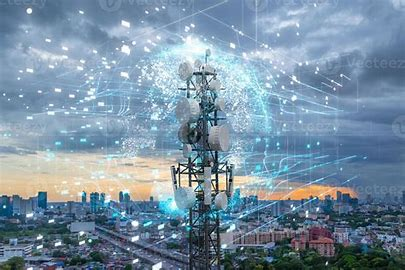

## Overview

This analysis encapsules the search behind determining whether customers for a telecommunication company descide to churn or not by testing various models to see which is most accurate. The said telecommunication company being SyriaTel. All this in hopes of improving their customer retention rates.

## Business Problem

SyriaTel is looking to identify what customers are likely to churn in order to take an active approach to try and retain these customers in order to prevent loss in revenue. By knowing what customers are likely to churn they can identify what aspects of their company need improvement.

## Data Understanding

The word churn refers to how many people choose to stop taking part in a service or product by a company. A [dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data) containing features for customers such as charges, number of calls, and voicemail plans among other things has been provided. To fully understand the data at hand, it will have to be separated between numeric and categorical features as well as put into different predictive models to test which performs best. 

## Data Preparation

### Explore Data

In [1]:
# Bring in the required libraries needed for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Load the csv file using Pandas and look at the first few rows
churn_df = pd.read_csv('C:\\Users\\bryan\\Documents\\Flatiron\\phase_3\\phase_3_project\\syriatel_churn_data.csv')

In [3]:
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Gather basic information over the datas rows and columns
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
churn_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Based on the above findings, one can see that there are 21 columns and there aren't any null values within the dataset. All columns having 3333 entries.

In [6]:
# Drop columns that would limit or that wouldn't provide any meaningful information to the task at hand
churn_df.drop(['phone number', 'area code', 'state'], axis=1, inplace=True)

In [7]:
churn_df

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### Evaluate Numeric and Categorical Columns

In [8]:
# Identify the categorical columns within the dataset
categorical_columns = ['international plan', 'voice mail plan', 'churn']

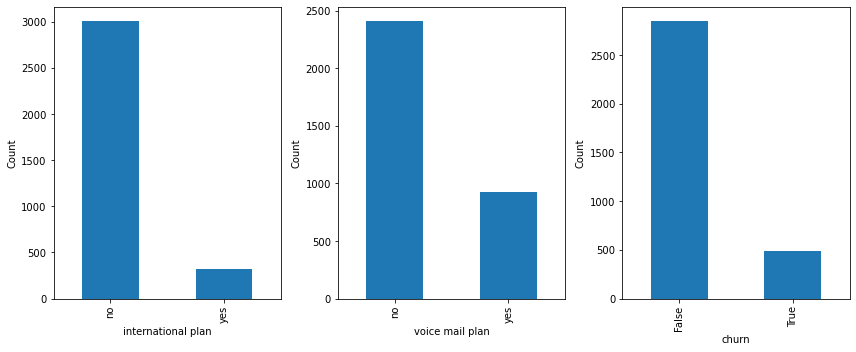

In [9]:
# Create a model to show the categorical columns
fig, axes = plt.subplots(ncols=len(categorical_columns), figsize=(12, 5))

for index, feature in enumerate(categorical_columns):
    churn_df[feature].value_counts().plot.bar(ax=axes[index])
    axes[index].set_xlabel(feature)
    axes[index].set_ylabel('Count')

plt.tight_layout()
plt.show()

The churn column will be the target variable moving forward in the analysis seeing that we want to predict the churn rate

In [10]:
# Identify the numeric columns within the dataset
numeric_columns = ['account length','number vmail messages', 'total day minutes',
                   'total day calls', 'total day charge', 'total eve minutes', 'total eve calls',
                   'total eve charge', 'total night minutes', 'total night calls', 'total night charge',
                   'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

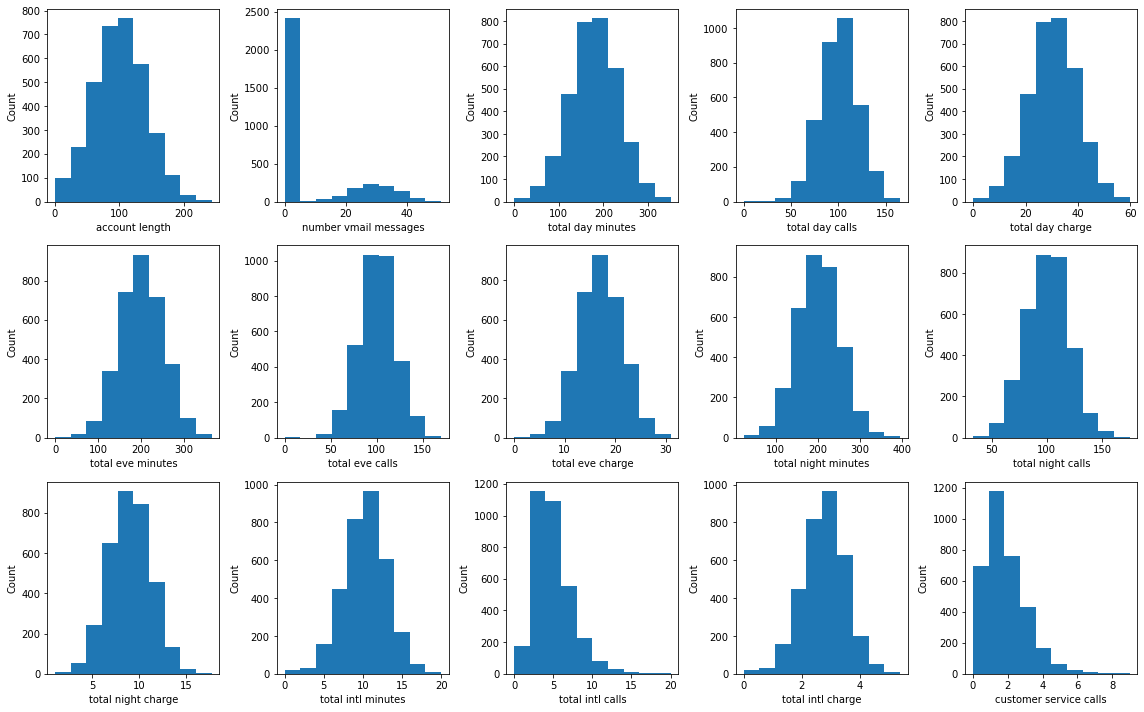

In [11]:
# Create a model to show the numerical columns
nrows = 3
ncols = 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 10))

for index, feature in enumerate(numeric_columns):
    row = index // ncols
    col = index % ncols
    churn_df[feature].plot.hist(ax=axes[row, col])
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [12]:
# Find the correlation matrix for the numeric columns
correlation_matrix = churn_df[numeric_columns].corr()

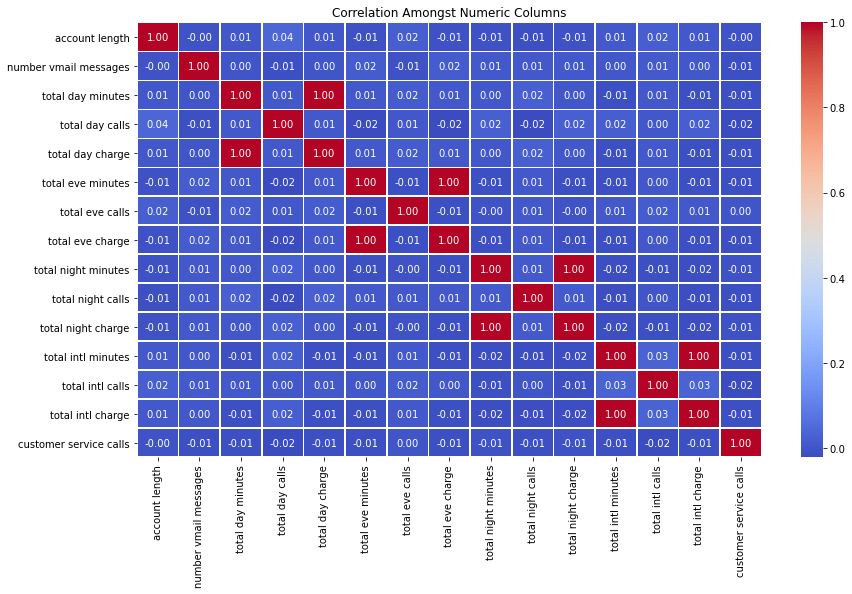

In [13]:
# Visualize a model to show the correlation between numeric columns
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Amongst Numeric Columns')
plt.show()

The above heat map indicates that there are four pairs of numeric columns that are giving off a high correlation score, those being:

    1.total dayly charge - total dayly minutes
    2.total eve charge - total eve minutes
    3.total night charge - total night minutes
    4.total intl charge - total intl minutes

### Churn Rate Calculation

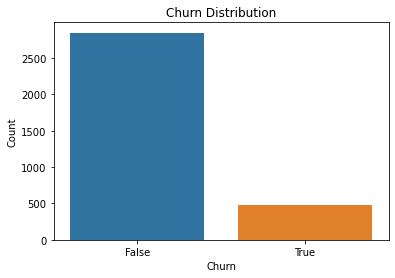

In [14]:
# Get a visualization of what the target variable (churn) looks like
sns.countplot(x='churn', data=churn_df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [15]:
print(churn_df.churn.value_counts())

False    2850
True      483
Name: churn, dtype: int64


In [16]:
483/3333

0.14491449144914492

The above findings show that approximately 14.5 percent of the customers churned

#### Establish X and y

In [17]:
# Establish y as the target variable and the remaining columns to X
y = churn_df['churn']
X = churn_df.drop('churn', axis=1)

#### Train - Test Split

In [18]:
# Create train-test split to avoid data leakage
# Set random state to 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### One Hot Encoding

As previously stated, there were three categorical columns. Seeing that the churn column was dropped to represent the y column, there remains two, international plan and voice mail plan. These two features will be one-hot encoded to better fit the model.

In [19]:
# Specify the categorical columns to be encoded
categorical_columns = ['international plan', 'voice mail plan']

In [20]:
ohe = OneHotEncoder(sparse=False, drop='first')

In [21]:
# Encode the categorical columns in the training set and in the test set using the fitted encoder
X_train_encoded = pd.DataFrame(ohe.fit_transform(X_train[categorical_columns]))

X_test_encoded = pd.DataFrame(ohe.transform(X_test[categorical_columns]))

In [22]:
# Set the index of the encoded training & test dataframe to the original train-test data
X_train_encoded.index = X_train.index

In [23]:
X_test_encoded.index = X_test.index

In [24]:
#Drop the original categorical columns from X_train and X_test
X_train.drop(categorical_columns, axis=1, inplace=True)

X_test.drop(categorical_columns, axis=1, inplace=True)

### Normalizing Numeric Features

In [25]:
# Set the StandardScaler
scaler = StandardScaler()

In [26]:
# Scale and transform the training-test data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)

X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [27]:
# Join the scaled numeric features and encoded categorical features for the training and test data
X_train_processed = pd.concat([X_train_scaled, X_train_encoded], axis=1)

X_test_processed = pd.concat([X_test_scaled, X_test_encoded], axis=1)

### SMOTE

In [28]:
# Set SMOTE to a random state of 42 
smote = SMOTE(random_state=42)

In [29]:
# Apply SMOTE oversampling to the training data
X_train_processed_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

## Modeling

### Logistic Regression

The first of three models that will be used to evaluate the data will be a logistic regression model

In [30]:
logreg = LogisticRegression()

In [31]:
# Fit the logistic regression model on the oversampled training data
logreg.fit(X_train_processed_smote, y_train_smote)

LogisticRegression()

In [32]:
# Use the logistic regression model on the train-test data to establish a prediction
logreg_train = logreg.predict(X_train_processed_smote)

logreg_test = logreg.predict(X_test_processed)

In [33]:
# Establish function to find the accuracy
def accuracy(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    tn = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 0])
    return (tp + tn) / float(len(y_hat))

In [34]:
# Establish a function to find the precision
def precision(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fp = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 1])
    return tp / float(tp + fp)

In [35]:
# Establish a function to find the recall
def recall(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fn = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 0])
    return tp / float(tp + fn)

In [36]:
# Establish a function to find the F1 score
def f1_score(y, y_hat):
    precision_score = precision(y, y_hat)
    recall_score = recall(y, y_hat)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)

In [37]:
print('LR Training Accuracy: ', accuracy(y_train, logreg_train))
print('LR Testing Accuracy: ', accuracy(y_test, logreg_test))
print()

print('LR Training Precision: ', precision(y_train, logreg_train))
print('LR Testing Precision: ', precision(y_test, logreg_test))
print()

print('LR Training Recall: ', recall(y_train, logreg_train))
print('LR Testing Recall: ', recall(y_test, logreg_test))
print()

print('LR Training F1-Score: ', f1_score(y_train, logreg_train))
print('LR Testing F1-Score: ', f1_score(y_test, logreg_test))

LR Training Accuracy:  0.4511910322279309
LR Testing Accuracy:  0.7793764988009593

LR Training Precision:  0.3578231292517007
LR Testing Precision:  0.3843137254901961

LR Training Recall:  0.7346368715083799
LR Testing Recall:  0.784

LR Training F1-Score:  0.4812442817932297
LR Testing F1-Score:  0.5157894736842106


#### Interpretation

The logistic regression model seems to have a poor performance. The accuracy, precision, and F1-score all seemed to all be low for both the training and testing dataset.

Create a Confusion Matrix for the logistic regression model

In [38]:
def plot_confusion_matrix(y_true, y_pred, class_labels):
    # Compute the confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_pred)

    # Create a ConfusionMatrixDisplay object with the confusion matrix and class labels
    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=class_labels)

    # Plot the confusion matrix using a colormap
    disp.plot(cmap=plt.cm.Blues)

    # Set the title and axis labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    # Display the plot
    plt.show()

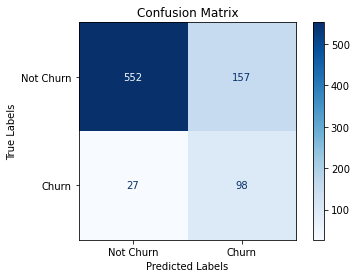

In [39]:
class_labels = ['Not Churn', 'Churn']
plot_confusion_matrix(y_test, logreg_test, class_labels)

    -True Positives: 98
    -False Positives: 157
    -False Negatives: 27
    -True Negatives: 552
This confusion matrix indicates that the model correctly predicted 98 instances of a customer churning, and correctly predicted 552 instances where customers didn't churn. However, the model incorrectly predicted 157 instances as not churn as churn. As well as 27 instances that were classified as not churn when they in fact did. The excesive amount of false positives and negatives indicate that this may not be the best model and that it may require some refining.

### Decision Tree

In [40]:
# Fit the model onto the training data
dt = DecisionTreeClassifier()
dt.fit(X_train_processed_smote, y_train_smote)

DecisionTreeClassifier()

In [41]:
# Use the decision tree model too establish a prediction
dt_train = dt.predict(X_train_processed_smote)
dt_test = dt.predict(X_test_processed)

In [42]:
print('DT Training Accuracy: ', accuracy(y_train, dt_train))
print('DT Testing Accuracy: ', accuracy(y_test, dt_test))
print()

print('DT Training Precision: ', precision(y_train, dt_train))
print('DT Testing Precision: ', precision(y_test, dt_test))
print()

print('DT Training Recall: ', recall(y_train, dt_train))
print('DT Testing Recall: ', recall(y_test, dt_test))
print()

print('DT Training F1-Score: ', f1_score(y_train, dt_train))
print('DT Testing F1-Score: ', f1_score(y_test, dt_test))

DT Training Accuracy:  0.583605791686128
DT Testing Accuracy:  0.8920863309352518

DT Training Precision:  1.0
DT Testing Precision:  0.6158940397350994

DT Training Recall:  1.0
DT Testing Recall:  0.744

DT Training F1-Score:  1.0
DT Testing F1-Score:  0.6739130434782609


#### Interpretation

The decision tree seemed to have a better performance than the logistic regression based on the testing and training scores both being higher on this model than the previous. However, there does seem to be some overfitting as the training data for the precision, recall, and f1 score all seem to be perfect while their testing counterpart is significantly lower in comparison. It is important to note that although some of these scores are higher for this model than the previos, this model still gives the impression it may struggle to properly generalize to unseen data.

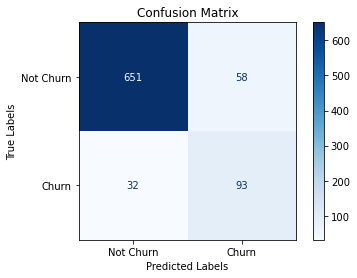

In [43]:
class_labels = ['Not Churn', 'Churn']
plot_confusion_matrix(y_test, dt_test, class_labels)

    -True Positives: 95
    -True Negatives: 650
    -False Negative: 30
    -False Positive: 59
This confusion matrix indicates that the model correctly predicted 95 instances of a customer churning, and correctly predicted 650 instances where customers didn't churn. However, the model incorrectly predicted 59 instances as not churn as churn. As well as 30 instances that were classified as not churn when they in fact did. As previously stated, the decision tree seems to be more promising than the logistic regression model, however, there is still overfitting. This could be delt with by either continueing to look into different models or applying hyperparameters.

### Random Forest 

In [44]:
# Train and fit the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_processed_smote, y_train_smote)

RandomForestClassifier(random_state=0)

In [45]:
# Use Random Forest Model to establish predictions
rf_train = rf.predict(X_train_processed_smote)
rf_test = rf.predict(X_test_processed)

In [46]:
print('RF Training Accuracy: ', accuracy(y_train, rf_train))
print('RF Testing Accuracy: ', accuracy(y_test, rf_test))
print()

print('RF Training Precision: ', precision(y_train, rf_train))
print('RF Testing Precision: ', precision(y_test, rf_test))
print()

print('RF Training Recall: ', recall(y_train, rf_train))
print('RF Testing Recall: ', recall(y_test, rf_test))
print()

print('RF Training F1-Score: ', f1_score(y_train, rf_train))
print('RF Testing F1-Score: ', f1_score(y_test, rf_test))

RF Training Accuracy:  0.583605791686128
RF Testing Accuracy:  0.9448441247002398

RF Training Precision:  1.0
RF Testing Precision:  0.8264462809917356

RF Training Recall:  1.0
RF Testing Recall:  0.8

RF Training F1-Score:  1.0
RF Testing F1-Score:  0.8130081300813008


#### Interpretation

The random forest model seems to be even better than the decision tree model. All aspects of the testing model seemed to have quite the improvement with an accuracy going up from 0.89 to 0.94. However, there still seems to be some overfitting due to the training set having a perfect score of 1.0. From here one can either continue to test different models or try to add hyperparameters to fix the overfitting of the model.

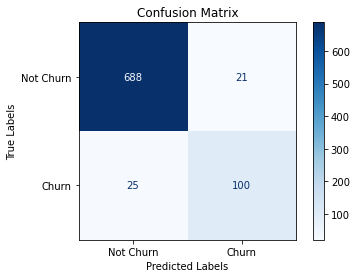

In [47]:
class_labels = ['Not Churn', 'Churn']
plot_confusion_matrix(y_test, rf_test, class_labels)

    -True Positives: 100
    -True Negatives: 688
    -False Negative: 21
    -False Positive: 25
This confusion matrix indicates that the model correctly predicted 100 instances of a customer churning, and correctly predicted 688 instances where customers didn't churn. However, the model incorrectly predicted 21 instances as not churn as churn. As well as 25 instances that were classified as not churn when they in fact did. This being a noticable improvement over the other two models.

### Defining Hyperparameters for Random Forest

Seeing that the random forest model had a better performance than the logistic regression and decision tree, the tuning hyperparameters will be added to the random forest to further improve it.

In [48]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rfm = RandomForestClassifier(random_state=0)

# Create a GridSearchCV object with the defined parameter grid and scoring metric
grid_search = GridSearchCV(estimator=rfm, param_grid=param_grid, scoring='recall', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_processed_smote, y_train_smote)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9458041958041958


In [49]:
# Train and fit the model as well as apply the parameters to the random forest model 
rndm_frst = RandomForestClassifier(
                             n_estimators=200,
                             random_state=0,
                             max_depth=15,
                             min_samples_leaf=1,
                             min_samples_split=2)
rndm_frst.fit(X_train_processed_smote, y_train_smote)

# Establish predictions for the test data
rndm_frst_train = rndm_frst.predict(X_train_processed_smote)
rndm_frst_test = rndm_frst.predict(X_test_processed)

In [50]:
print('rndm_frst Training Accuracy: ', accuracy(y_train, rndm_frst_train))
print('rndm_frst Testing Accuracy: ', accuracy(y_test, rndm_frst_test))
print()

print('rndm_frst Training Precision: ', precision(y_train, rndm_frst_train))
print('rndm_frst Testing Precision: ', precision(y_test, rndm_frst_test))
print()

print('rndm_frst Training Recall: ', recall(y_train, rndm_frst_train))
print('rndm_frst Testing Recall: ', recall(y_test, rndm_frst_test))
print()

print('rndm_frst Training F1-Score: ', f1_score(y_train, rndm_frst_train))
print('rndm_frst Testing F1-Score: ', f1_score(y_test, rndm_frst_test))

rndm_frst Training Accuracy:  0.5829051844932275
rndm_frst Testing Accuracy:  0.9496402877697842

rndm_frst Training Precision:  1.0
rndm_frst Testing Precision:  0.8429752066115702

rndm_frst Training Recall:  0.9916201117318436
rndm_frst Testing Recall:  0.816

rndm_frst Training F1-Score:  0.9957924263674615
rndm_frst Testing F1-Score:  0.8292682926829268


Based on the newly tuned and revised model, one can see that both the f1-score and the precision went up for the testing data. The recall too had an increase, even though it was a relatively small one. There was a noticable drop in comparison to the previous model in regards to the overfitting.

#### Revised Confusion Matrix

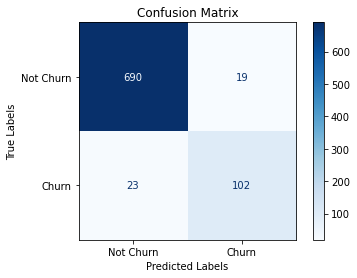

In [51]:
plot_confusion_matrix(y_test, rndm_frst_test, class_labels)

    -True Positives: 102
    -True Negatives: 690
    -False Negative: 19
    -False Positive: 23
The above revised matrix shows the were 102 instances where the model correctly predicted that a customer would churn and they did, as well as correctly predicting that 690 customers to not churn. However, the model incorrectly predicted 19 instances as not churn as churn. As well as 23 instances that were classified as not churn when they in fact did. None the less, it is an improvement over all the previous models.

### ROC Curve

In [52]:
# Create a dictionary of all the fitted models
fitted_models = {
    'Logistic Regression': logreg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Random Forest Revised': rndm_frst
    }

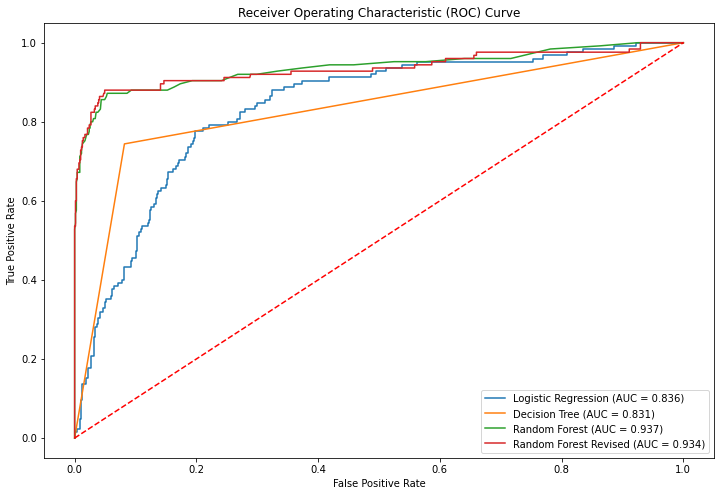

In [53]:
plt.figure(figsize=(12, 8))

# Iterate over fitted models
for model_name, model in fitted_models.items():
    # Predict probabilities for positive class
    y_probas = model.predict_proba(X_test_processed)[:, 1]
    
    # Compute false positive rate, true positive rate, and thresholds
    fpr, tpr, _ = roc_curve(y_test, y_probas)
    
    # Compute area under the curve
    auc = roc_auc_score(y_test, y_probas)
    
    # Plot the ROC curve for the current model
    plt.plot(fpr, tpr, label="{} (AUC = {:.3f})".format(model_name, auc))

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Set labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

As shown in the graph above, the four models all have a decent overall performance. Coming in last however is the Logistic Regression curve with an AUC of approximately 0.836. This is followed by the Decision Tree with an AUC of about 0.838. Ultimately leaving the two fandom forest models with the highest AUC. The original random forest model with an AUC of 0.937 and the Revised with an AUC of 0.934. In this instance, the model that will be chosen will be the Revised Random Forest model due to this model not being overfitted. Even this the other model has a higher AUC, it is a very slim difference of only 0.003.

### Finding the Most Important Features

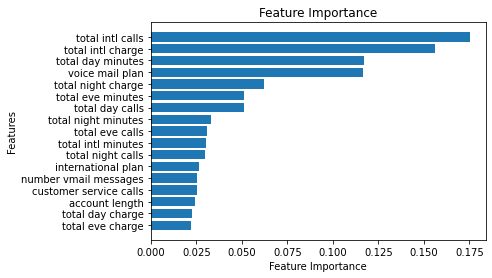

In [54]:
feature_importance = rndm_frst.feature_importances_
feature_names = churn_df.columns[:-1]  # Exclude the target variable from feature names
sorted_indices = feature_importance.argsort()

plt.barh(range(len(feature_names)), feature_importance[sorted_indices])
plt.yticks(range(len(feature_names)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

As a company SyriaTel should always look to improve in every way possible but it appears to be that a feature that they should pay closer attention to is the amount of international calls their customers are making and how much they are charging them to make international calls.

## Evaluation

This analysis consisted of first looking at three basic models, them being a logistic regression model, a decision tree model, and a random forest model. After looking at the results one could see that both the decision decision tree and random forest performed better than the logistic regression model but both displayed overfitting. With that said the random forest model had a better overall score than the decision tree so hyperparameters were added to deal with the over fitting. It displayed an accuracy of 0.95, an f1-score of 0.83, recall of 0.82, and a precision of 0.84. 
Moving onto the ROC curve, the refined random forest model displayed an AUC (area under curve) of 0.934. Which was lower than the standered random forest model by only 0.003 but was the prefered model due to it removing the overfitting.


## Conclusion

Ultimately, the telecommunication company of SyriaTel would be recommended to use the Random Forest model with the applied hyperparameters. The model had an overall accuracy of approximately 94.96%. A further good indicator of a successful model is a high f1-score (0.83), which can only be high if the recall and precision is high. As previously stated, as a company SyriaTel should always look to improve in every way possible for customer improvement, however they should look into the amouont of international calls their customers are making and how much they are charging for international calls. While at it review the voice mail plans that the customers have and customer service.

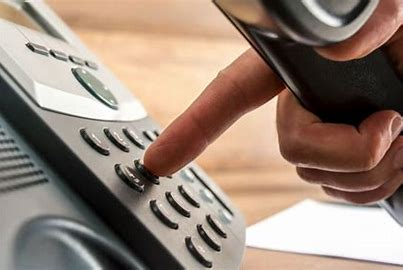